<a href="https://colab.research.google.com/github/JaejinLee1215/DeepLearning/blob/main/JaejinLee1215/ch09_DL_10_RNN_%EC%9D%B4%EC%9E%AC%EC%A7%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RNN

## 데이터 불러오기

In [1]:
# https://financedata.github.io/posts/finance-data-reader-users-guide.html
# https://github.com/financedata-org/FinanceDataReader
# https://pypi.org/
!pip install yfinance -q

In [2]:
import yfinance as yf

> yfinance를 활용한 대표적인 코드 예제들을 5개 제시해줘
* https://sharegpt.com/c/CR9Rf1h

In [3]:
history = yf.Ticker('SBUX').history(period='max') # 스타벅스의 주식 코드 -> pandas df
history

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1992-06-26 00:00:00-04:00,0.262217,0.277825,0.255974,0.268461,224358400,0.0,0.0
1992-06-29 00:00:00-04:00,0.271582,0.293434,0.265339,0.287190,58732800,0.0,0.0
1992-06-30 00:00:00-04:00,0.293434,0.296555,0.274704,0.277825,34777600,0.0,0.0
1992-07-01 00:00:00-04:00,0.280947,0.287190,0.271582,0.284069,18316800,0.0,0.0
1992-07-02 00:00:00-04:00,0.287190,0.287190,0.277825,0.284069,13996800,0.0,0.0
...,...,...,...,...,...,...,...
2023-03-29 00:00:00-04:00,99.330002,100.690002,98.739998,100.620003,4946600,0.0,0.0
2023-03-30 00:00:00-04:00,101.440002,101.699997,100.650002,101.320000,4082600,0.0,0.0
2023-03-31 00:00:00-04:00,101.839996,104.279999,101.839996,104.129997,6899300,0.0,0.0


In [4]:
# Date -> 인덱스에서 뽑아내기
history.reset_index(inplace=True) # inplace -> 새롭게 변수에 대입을 안해줘도 원본 객체 수정이 되도록
history.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1992-06-26 00:00:00-04:00,0.262217,0.277825,0.255974,0.268461,224358400,0.0,0.0
1,1992-06-29 00:00:00-04:00,0.271582,0.293434,0.265339,0.287190,58732800,0.0,0.0
2,1992-06-30 00:00:00-04:00,0.293434,0.296555,0.274704,0.277825,34777600,0.0,0.0
3,1992-07-01 00:00:00-04:00,0.280947,0.287190,0.271582,0.284069,18316800,0.0,0.0
4,1992-07-02 00:00:00-04:00,0.287190,0.287190,0.277825,0.284069,13996800,0.0,0.0


In [5]:
history.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
7745,2023-03-29 00:00:00-04:00,99.330002,100.690002,98.739998,100.620003,4946600,0.0,0.0
7746,2023-03-30 00:00:00-04:00,101.440002,101.699997,100.650002,101.320000,4082600,0.0,0.0
7747,2023-03-31 00:00:00-04:00,101.839996,104.279999,101.839996,104.129997,6899300,0.0,0.0
7748,2023-04-03 00:00:00-04:00,104.059998,104.940002,103.669998,104.849998,3855400,0.0,0.0
7749,2023-04-04 00:00:00-04:00,104.849998,105.010002,103.349998,104.000000,3854100,0.0,0.0


In [6]:
# history = history[['Date', 'Open', 'High', 'Low', 'Close']] # 학습에 사용할 데이터만 남겨주기
history[['Date', 'Open', 'High', 'Low', 'Close']]
history.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]
history.iloc[:,0:5]
history.loc[:,'Date':'Close']

,Date,Open,High,Low,Close
0,1992-06-26 00:00:00-04:00,0.262217,0.277825,0.255974,0.268461
1,1992-06-29 00:00:00-04:00,0.271582,0.293434,0.265339,0.287190
2,1992-06-30 00:00:00-04:00,0.293434,0.296555,0.274704,0.277825
3,1992-07-01 00:00:00-04:00,0.280947,0.287190,0.271582,0.284069
4,1992-07-02 00:00:00-04:00,0.287190,0.287190,0.277825,0.284069
...,...,...,...,...,...
7745,2023-03-29 00:00:00-04:00,99.330002,100.690002,98.739998,100.620003
7746,2023-03-30 00:00:00-04:00,101.440002,101.699997,100.650002,101.320000
7747,2023-03-31 00:00:00-04:00,101.839996,104.279999,101.839996,104.129997
7748,2023-04-03 00:00:00-04:00,104.059998,104.940002,103.669998,104.849998


In [7]:
history = history.loc[:,'Date':'Close']

In [8]:
history.head() # 수정주가

,Date,Open,High,Low,Close
0,1992-06-26 00:00:00-04:00,0.262217,0.277825,0.255974,0.268461
1,1992-06-29 00:00:00-04:00,0.271582,0.293434,0.265339,0.287190
2,1992-06-30 00:00:00-04:00,0.293434,0.296555,0.274704,0.277825
3,1992-07-01 00:00:00-04:00,0.280947,0.287190,0.271582,0.284069
4,1992-07-02 00:00:00-04:00,0.287190,0.287190,0.277825,0.284069


In [9]:
import pandas as pd

In [10]:
# 시간 없애고 날짜만 남기기
# dt.date => str (문자열)
# 시간을 없애기 위해서 -> datetime -> dt.date (시간 X)
# history.Date.dt.date # dtype: object -> 문자열
history['Date'] = pd.to_datetime(history['Date'].dt.date)
history.head()

,Date,Open,High,Low,Close
0,1992-06-26,0.262217,0.277825,0.255974,0.268461
1,1992-06-29,0.271582,0.293434,0.265339,0.287190
2,1992-06-30,0.293434,0.296555,0.274704,0.277825
3,1992-07-01,0.280947,0.287190,0.271582,0.284069
4,1992-07-02,0.287190,0.287190,0.277825,0.284069


In [11]:
history.describe(include='all')

<ipython-input-11-37dc76420ef0>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  history.describe(include='all')


,Date,Open,High,Low,Close
count,7750,7750.000000,7750.000000,7750.000000,7750.000000
unique,7750,NaN,NaN,NaN,NaN
top,1992-06-26 00:00:00,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
first,1992-06-26 00:00:00,NaN,NaN,NaN,NaN
last,2023-04-04 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,24.892245,25.144272,24.637928,24.899060
std,NaN,30.316509,30.595130,30.034862,30.323737
min,NaN,0.262217,0.277825,0.255974,0.268461
25%,NaN,3.346391,3.457271,3.252554,3.370365


In [12]:
# between(A, B) A와 B 사이의 날짜만 표시 (포함)
# df = history[history.Date.between('2019-01-01', '2022-12-31')] # 2019, 2020, 2021, 2022 -> 4개년
# 인덱스를 리셋하고 기존 인덱스를 삭제
# history[history.Date.between('2019-01-01', '2022-12-31')]
# history[history.Date.between('2019-01-01', '2022-12-31')].reset_index()
# history[history.Date.between('2019-01-01', '2022-12-31')].reset_index(drop=True)
df = history[history.Date.between('2019-01-01', '2022-12-31')].reset_index(drop=True)
df # 주식시장에서의 1년 252일.

,Date,Open,High,Low,Close
0,2019-01-02,58.555236,59.189709,58.123059,59.143730
1,2019-01-03,58.352935,58.592013,56.458719,56.578255
2,2019-01-04,57.378246,59.079362,57.083999,58.454086
3,2019-01-07,58.251790,59.070165,57.690884,58.454086
4,2019-01-08,58.794304,59.116140,57.975929,58.500057
...,...,...,...,...,...
1003,2022-12-23,97.103427,97.809894,96.396968,97.780037
1004,2022-12-27,98.078542,98.964104,97.720337,98.705399
1005,2022-12-28,98.914357,99.411864,97.899439,98.108391
1006,2022-12-29,98.506403,100.148177,98.178046,99.272560


<ipython-input-13-15613968b33e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_used['Close'] = df['Close'] # 정답 : 종가


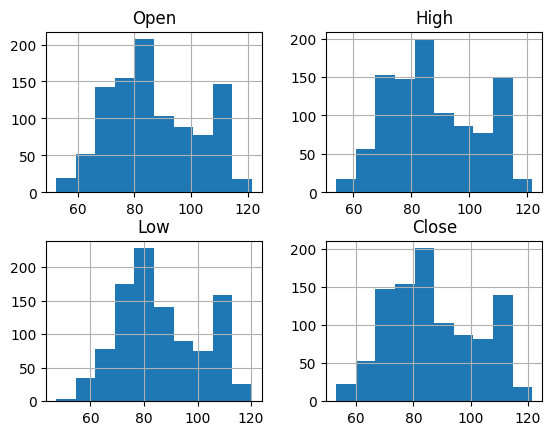

In [13]:
# 시간 순서대로 주가를 분석해서 -> 다음날의 종가(Close)를 예측
df_used = df[['Open', 'High', 'Low']] # 입력 : 개장가 / 최고가 / 최저가
df_used['Close'] = df['Close'] # 정답 : 종가
hist = df_used.hist()

## 데이터셋 만들기

In [14]:
# 학습용 데이터셋 (Starbucks)
import numpy as np
from torch.utils.data.dataset import Dataset

class Starbucks(Dataset):
    def __init__(self) -> None:
        super().__init__()
        # [입력값]
        self.data = df_used.drop('Close', axis=1).values # 값은 있는 numpy 배열
        self.data = self.data / np.max(self.data) # np.max 해당 배열에서 가장 큰값 -> 0~1 사이로 데이터를 스케일링
        # 데이터 정규화, 스케일링...
        # [정답값]
        self.label = df_used['Close'].values
        self.label = self.label / np.max(self.label) # 0~1
        
    def __len__(self): # 30일치를 묶어서 학습 -> 사용가능한 배치 개수
        return len(self.data) - 30 # 29개 미만인 경우를 제한
    
    # 배치를 조회할 때마다 가져오는 데이터
    def __getitem__(self, i):
        data = self.data[i:i+30]
        label = self.label[i+30]
        return data, label

## 모델 정의

In [15]:
import torch
import torch.nn as nn

In [16]:
df_used.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1008 non-null   float64
 1   High    1008 non-null   float64
 2   Low     1008 non-null   float64
 3   Close   1008 non-null   float64
dtypes: float64(4)
memory usage: 31.6 KB


In [17]:
class RNN(nn.Module):
    def __init__(self):
        super().__init__()

        # RNN 층 정의
        # Open, High, Low
        self.rnn = nn.RNN( # 3, 30 -> 8, 30
            input_size=3, hidden_size=8,
            num_layers=5, # RNN층을 몇 개 쌓을까? (3~5?)
            # 너무 많으면 -> 기울기 소실 -> 특징을 업데이트 X
            # 너무 적으면 -> 기울기 폭발 -> 학습 X
            batch_first=True,
            # pytorch RNN에서 batch_first=True를 설정해줘야하는 이유가 뭐야?
            # https://sharegpt.com/c/glp5Jzl
        )

        # FC / MLP => 분류 예측
        # 주가(종가)를 예측하는 MLP층 정의
        # view, flatten
        self.fc1 = nn.Linear(in_features=8*30, out_features=64)
        self.fc2 = nn.Linear(in_features=64, out_features=1) # 적절한 fc층은 몇 층일까? 채널 수는 I/O
        self.relu = nn.ReLU()
        
    # 순전파
    def forward(self, x, h0):
        x, hn = self.rnn(x, h0) # RNN층의 출력
        #  x -> 층을 거쳐 나온 결과 (출력층) . hn은 모든 RNN층의 은닉 상태 (누적 가중치)
        x = torch.reshape(x, (x.shape[0], -1))
        
        # FC(fully-connected, 전결합층), MLP(multi-layer perceptron, 다층 퍼셉트론)층
        x = self.fc1(x)
        x = self.relu(x)
        # x = F.relu(self.fc1(x))
        x = self.fc2(x)

        # 출력층
        x = torch.flatten(x) # 예측한 종가를 1차원 표현
        return x

In [18]:
from tqdm.notebook import tqdm # 진척 상황 시각화 라이브러리
from torch.optim.adam import Adam # 가장 무난하게 쓰이는 최적함수
from torch.utils.data.dataloader import DataLoader # 데이터셋 -> 데이터로더 -> 배치사이즈별로 학습

In [19]:
import numpy as np
from torch.utils.data.dataset import Dataset
from sklearn.preprocessing import MinMaxScaler

class Starbucks(Dataset):
    def __init__(self) -> None:
        super().__init__()
        # [입력값]
        self.data = df_used.drop('Close', axis=1).values # 값은 있는 numpy 배열
        scaler = MinMaxScaler()
        self.data = scaler.fit_transform(self.data) # MinMaxScaler를 사용하여 데이터 스케일링
        # [정답값]
        self.label = df_used['Close'].values
        scaler = MinMaxScaler()
        self.label = scaler.fit_transform(self.label.reshape(-1, 1)).squeeze() # MinMaxScaler를 사용하여 데이터 스케일링
        # squeeze() 함수는 numpy 배열에서 차원을 제거하여 1차원으로 만듭니다.
        
    def __len__(self): # 30일치를 묶어서 학습 -> 사용가능한 배치 개수
        return len(self.data) - 30 # 29개 미만인 경우를 제한
    
    # 배치를 조회할 때마다 가져오는 데이터
    def __getitem__(self, i):
        data = self.data[i:i+30]
        label = self.label[i+30]
        return data, label

In [20]:
dataset = Starbucks()
loader = DataLoader(dataset, batch_size=32)

In [21]:
device = 'cuda' if torch.cuda.is_available() else "cpu"

model = RNN().to(device)

  Preparing metadata (setup.py) ... done


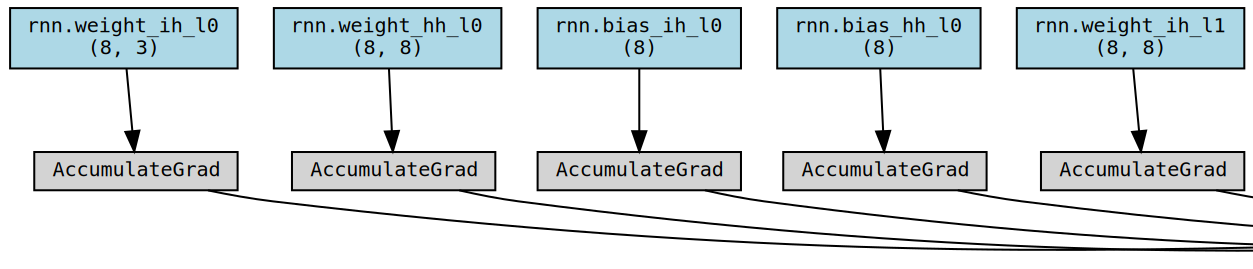

In [22]:
!pip install torchviz -q
from torchviz import make_dot

# 모델 시각화
x = torch.randn(1, 30, 3).to(device)  # 입력 데이터 생성
h0 = torch.randn(5, 1, 8).to(device)  # 은닉 상태 초기화
make_dot(model(x, h0), params=dict(model.named_parameters()))

In [23]:
device

'cuda'

In [24]:
optim = Adam(params=model.parameters(), lr=0.0001)

In [25]:
for epoch in range(50):
    iterator = tqdm(loader)
    for data, label in iterator:
        optim.zero_grad()
        # 초기 은닉 상태
        # RNN 레이어 수, 배치 크기, 은닉층의 면(데이터 들어오는 창구)
        h0 = torch.zeros(5, data.shape[0], 8).to(device)
        # 모델의 예측값
        preds = model(data.type(torch.FloatTensor).to(device), h0) # x, h0
        # 손실 계산
        loss = nn.MSELoss()(preds, label.type(torch.FloatTensor).to(device))
        loss.backward() # 역전파
        optim.step() # 최적화

        iterator.set_description(f"epoch{epoch} loss:{loss.item()}")

torch.save(model.state_dict(), "./rnn.pth")

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

In [26]:
import matplotlib.pyplot as plt

loader = DataLoader(dataset, batch_size=1) # 예측값을 위한 데이터 로더

preds = [] # 예측값 저장할 리스트
total_loss = 0

with torch.no_grad():
    model.load_state_dict(torch.load('rnn.pth', map_location=device))

    for data, label in loader:
        h0 = torch.zeros(5, data.shape[0], 8).to(device)

        pred = model(data.type(torch.FloatTensor).to(device), h0)
        preds.append(pred.item()) # 실제값과 예측값 사이의 비교를 위해서 예측값을 저장

        # 손실 계산
        loss = nn.MSELoss()(pred, label.type(torch.FloatTensor).to(device))
        total_loss += loss/len(loader) # 손실의 평균치

In [27]:
total_loss.item()

0.003239305689930916

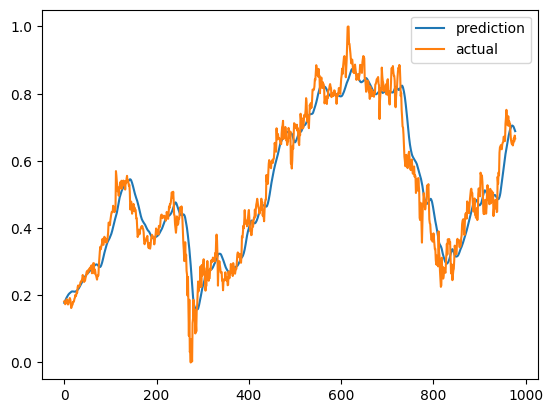

In [28]:
plt.plot(preds, label='prediction')
plt.plot(dataset.label[30:], label='actual')
plt.legend()
plt.show()

In [29]:
import torch
import torch.nn as nn
from tqdm.notebook import tqdm
from torch.optim.adam import Adam
from torch.utils.data.dataloader import DataLoader
import matplotlib.pyplot as plt

class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()
        self.rnn = nn.RNN(input_size=3,
                          hidden_size=8,
                          num_layers=5,
                          batch_first=True)
        self.fc1 = nn.Linear(in_features=240, out_features=64)
        self.fc2 = nn.Linear(in_features=64, out_features=1)
        self.relu = nn.ReLU()
    def forward(self, x, h0):
        x, hn = self.rnn(x, h0)
        x = torch.reshape(x, (x.shape[0], -1))
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = torch.flatten(x)
        return x

def use_rnn(dataset):
    device = 'cuda' if torch.cuda.is_available() else "cpu"
    model = RNN().to(device)
    # dataset = Netflix()
    train_loader = DataLoader(dataset, batch_size=32)
    optim = Adam(params=model.parameters(), lr=0.0001)
    learn(model, train_loader, optim)
    pred_loader = DataLoader(dataset, batch_size=1)
    preds = predict(model, pred_loader)
    visualize(preds, dataset)

def learn(model, loader, optim):
    for epoch in range(200):
        iterator = tqdm(loader)
        for data, label in iterator:
            optim.zero_grad()
            h0 = torch.zeros(5, data.shape[0], 8).to(device)
            preds = model(data.type(torch.FloatTensor).to(device), h0)
            loss = nn.MSELoss()(preds, label.type(torch.FloatTensor).to(device))
            loss.backward()
            optim.step()
            iterator.set_description(f"epoch{epoch} loss:{loss.item()}")
    torch.save(model.state_dict(), "./rnn.pth")

def predict(model, loader):
    preds = [] # 예측값 저장할 리스트
    total_loss = 0
    with torch.no_grad(): 
        model.load_state_dict(torch.load('rnn.pth', map_location=device))
        for data, label in loader:
            h0 = torch.zeros(5, data.shape[0], 8).to(device)
            pred = model(data.type(torch.FloatTensor).to(device), h0)
            preds.append(pred.item())
            loss = nn.MSELoss()(pred, label.type(torch.FloatTensor).to(device))
            total_loss += loss/len(loader)
    print(f"total_loss : {total_loss.item()}")
    return preds

def visualize(preds, dataset):
    plt.plot(preds, label="prediction")
    plt.plot(dataset.label[30:], label="actual")
    plt.legend()
    plt.show()

In [30]:
# Dataset 학습용 데이터셋 (Netflix)
import numpy as np
from torch.utils.data.dataset import Dataset
import yfinance as yf
import pandas as pd

class Stock(Dataset):
    def __init__(self, ticker, start_date, end_date):
        df = yf.Ticker(ticker).history(period='max').reset_index()
        df.Date = pd.to_datetime(df.Date.dt.date) # 날짜만 끊어줌
        # yyyy-MM-dd
        df2 = df[df['Date'].between(start_date, end_date)].reset_index(drop=True)

        # 데이터 정규화
        self.data = df2[['Open', 'High', 'Low']].values
        self.data = self.data / np.max(self.data) # np.max 배열에서 가장 큰 값

        self.label = df2['Close'].values
        self.label = self.label / np.max(self.label)
    
    # 사용가능한 배치 개수를 반환하는 __len__()
    def __len__(self):
        return len(self.data) - 30 # 사용가능한 배치 계수
        # 30일치가 묶여서 batch 

    # 30일치 데이터를 읽어오는 함수
    def __getitem__(self, i): # 0 ~ len-1
        data = self.data[i:i+30] # 입력데이터(시가,고가,저가,날짜)
        label = self.label[i+30] # 종가
        return data, label

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

total_loss : 0.004163538571447134


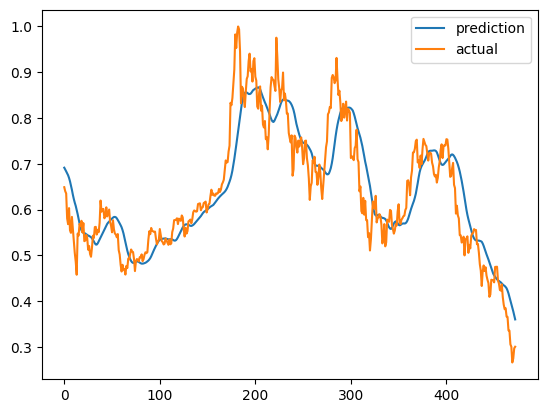

In [31]:
use_rnn(Stock('TSLA', '2021-01-01', '2022-12-31'))

> 최신 RNN 알고리즘을 사용해서 주가를 예측하는 PyTorch 신경망 모델 짜줘
* https://sharegpt.com/c/FLCqp68